In [23]:
# Vanilla Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gmean
import src.Luminosity.red_tree as red
# Custom Imports
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [5 , 4]
Rsol_to_cm = 6.957e10 # [cm]

num_array = np.arange(2000, 9000, 1000)
snap = 844
m = 6

In [2]:
lum = np.zeros(len(num_array))
rays_photo_mean = np.zeros(len(num_array))
for i,num in enumerate(num_array):
    print('num ', num)
    lum[i], rays_photo = red.doer_of_thing(snap, m, num) 
    rays_photo_mean[i] = gmean(rays_photo)

num  2000
Max:  32
Zero due to: 
- max travel:  0
- T_low: 0
- flux: 0
Flux:  160
Tot zeros: 0
Negative:  32
Fix 844 , Lum 9.693e+42 
---------
num  3000
Max:  31
Zero due to: 
- max travel:  0
- T_low: 0
- flux: 0
Flux:  161
Tot zeros: 0
Negative:  31
Fix 844 , Lum 9.840e+42 
---------
num  4000
Max:  32
Zero due to: 
- max travel:  0
- T_low: 0
- flux: 0
Flux:  160
Tot zeros: 0
Negative:  32
Fix 844 , Lum 9.773e+42 
---------
num  5000
Max:  33
Zero due to: 
- max travel:  0
- T_low: 0
- flux: 0
Flux:  159
Tot zeros: 0
Negative:  33
Fix 844 , Lum 9.706e+42 
---------
num  6000
Max:  33
Zero due to: 
- max travel:  0
- T_low: 0
- flux: 0
Flux:  159
Tot zeros: 0
Negative:  33
Fix 844 , Lum 9.695e+42 
---------
num  7000
Max:  33
Zero due to: 
- max travel:  0
- T_low: 0
- flux: 0
Flux:  159
Tot zeros: 0
Negative:  33
Fix 844 , Lum 9.715e+42 
---------
num  8000
Max:  33
Zero due to: 
- max travel:  0
- T_low: 0
- flux: 0
Flux:  159
Tot zeros: 0
Negative:  33
Fix 844 , Lum 9.735e+42 
--

In [3]:
with open('data/red/convergence_m'+ str(m) + '.txt', 'a') as file:
    file.write('# num\n') 
    file.write(' '.join(map(str, num_array)) + '\n')
    file.write('# Lum \n') 
    file.write(' '.join(map(str, lum)) + '\n')
    file.write('# gmean R_{ph} \n') 
    file.write(' '.join(map(str, rays_photo_mean)) + '\n')
    file.close() 

In [24]:
data = np.loadtxt('data/red/convergence_m6.txt')
num_plot = data[0]
lum_plot = data[1]
photo_plot = data[2]/Rsol_to_cm

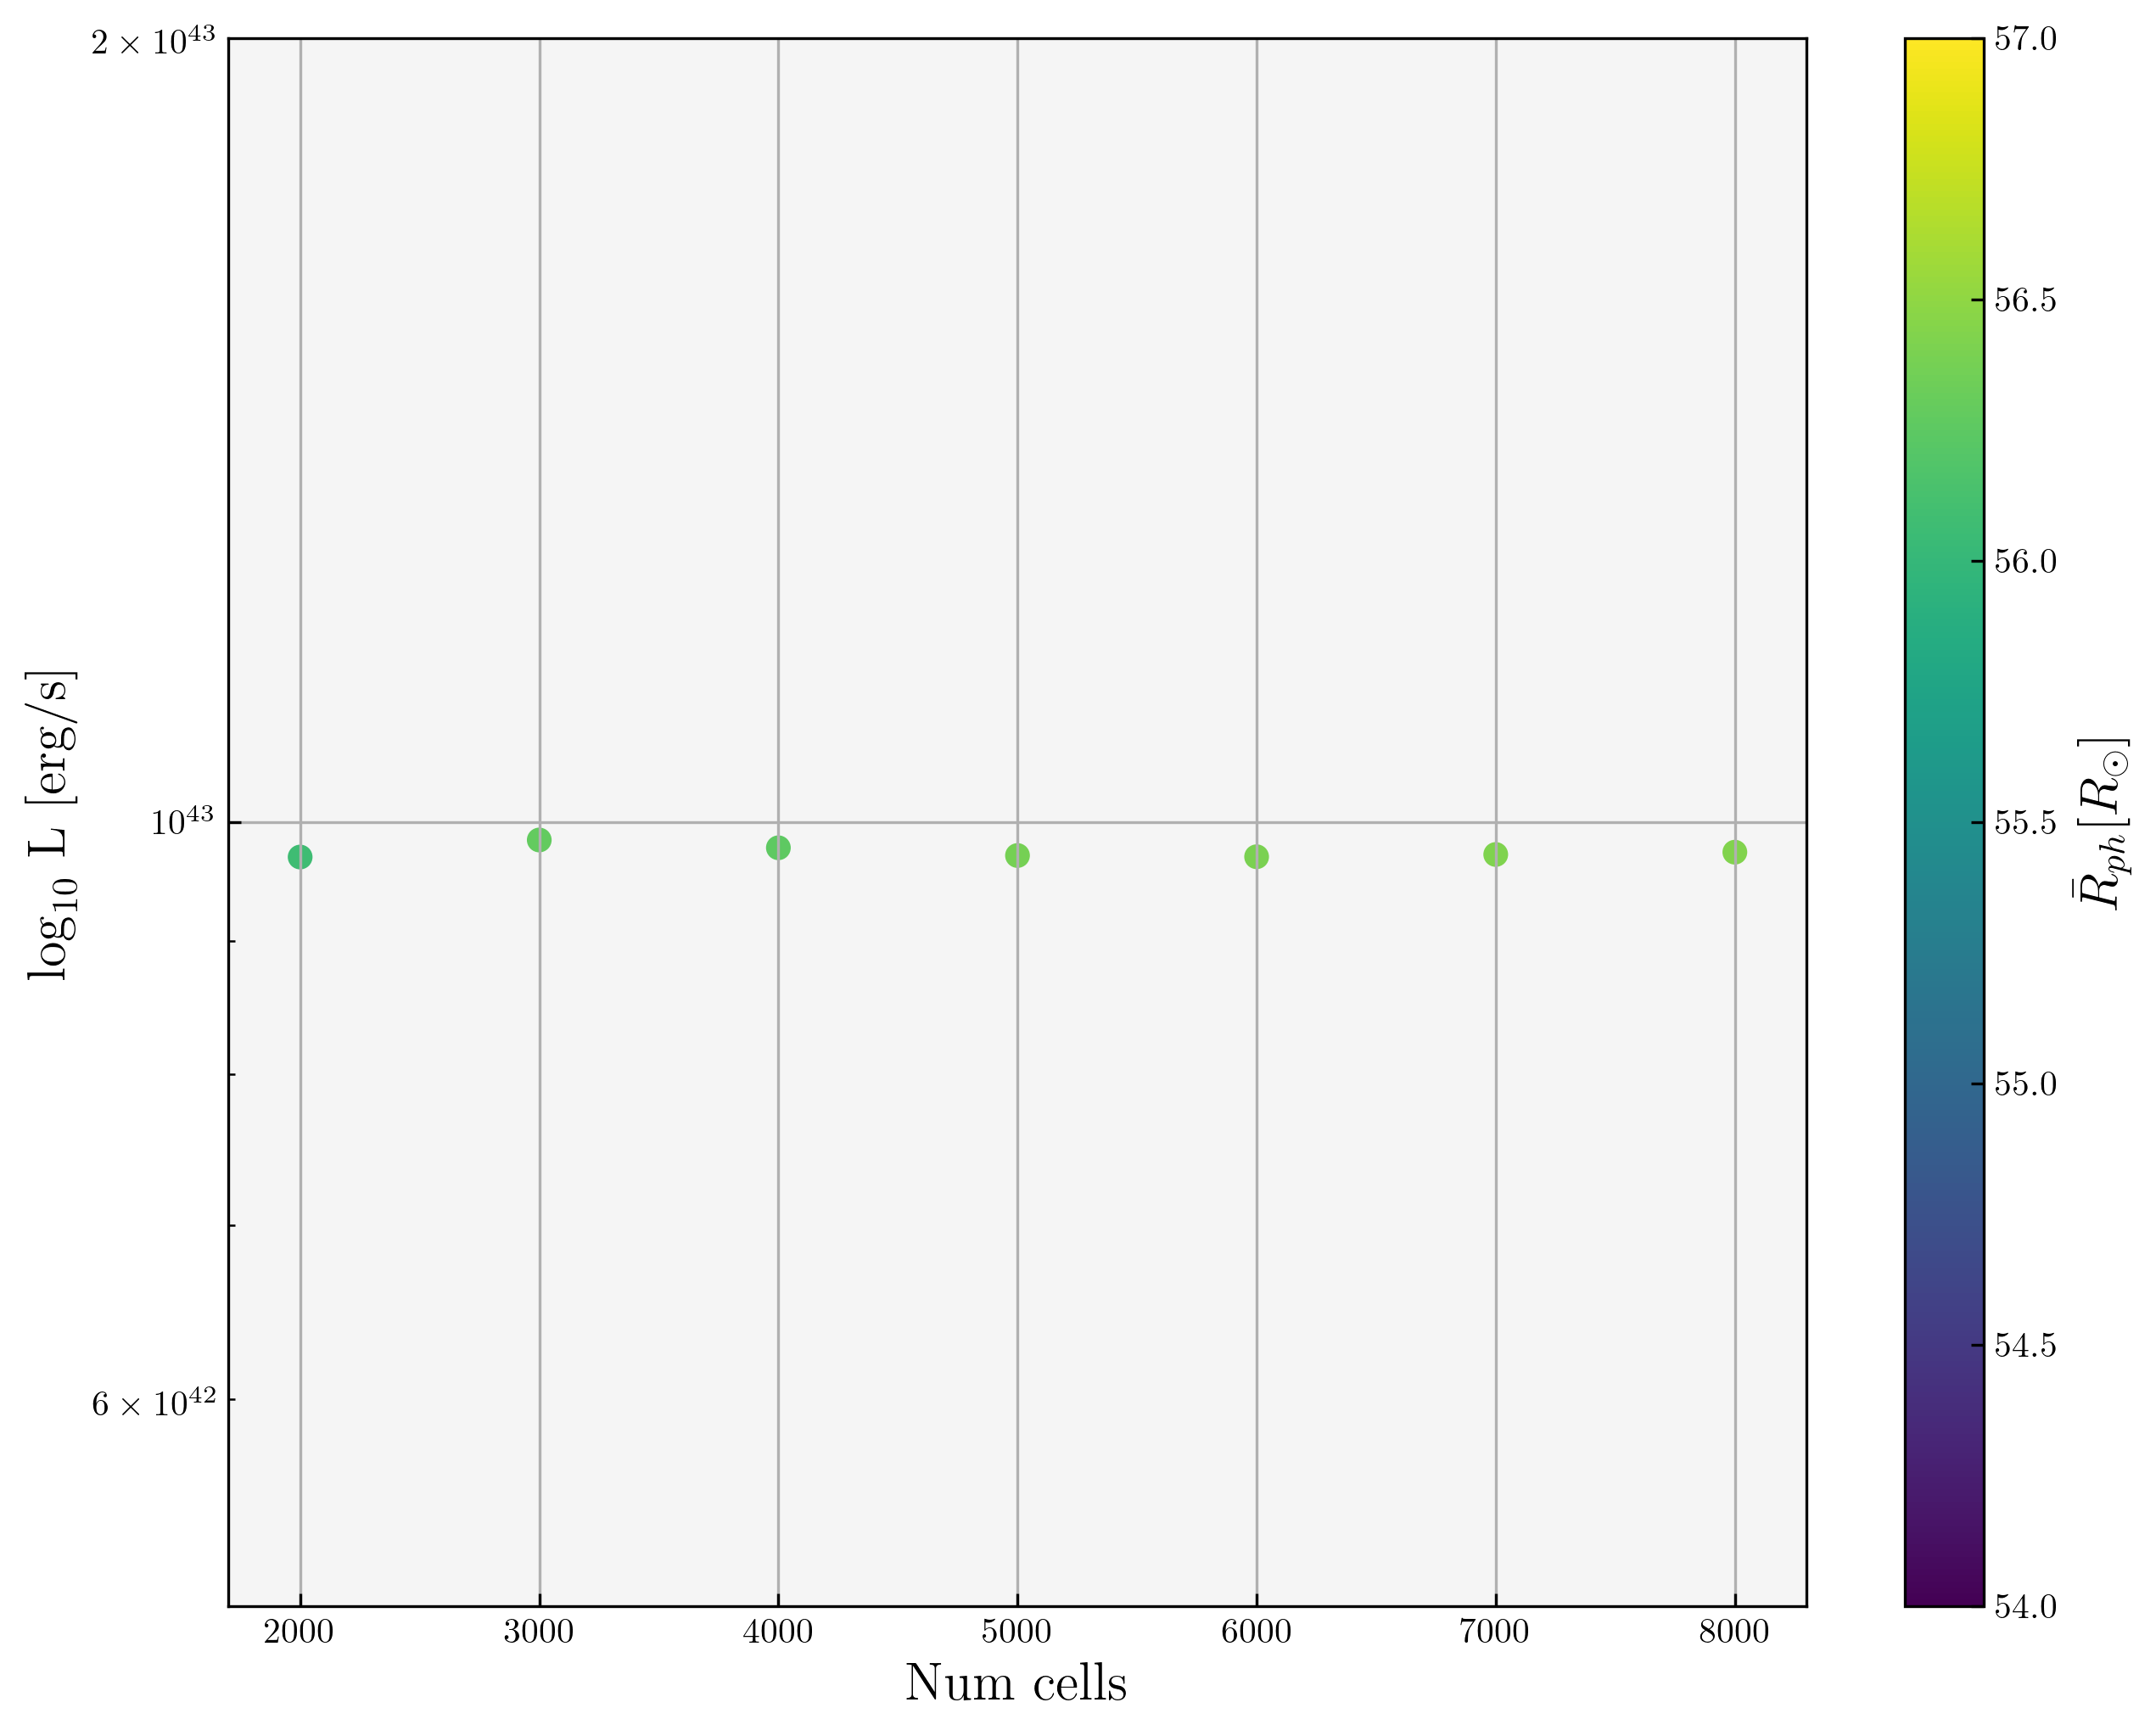

In [35]:
img, ax = plt.subplots(figsize = (10,8))
fig = ax.scatter(num_plot, lum_plot, c = photo_plot, vmin = 54, vmax = 57)
cbar = img.colorbar(fig)
cbar.set_label(r'$\bar{R}_{ph} [R_\odot]$', fontsize = 15)
ax.set_ylabel('$\log_{10}$ L [erg/s]', fontsize = 15)
ax.set_xlabel('Num cells', fontsize = 15)
ax.set_yscale('log')
ax.set_ylim(5e42,2e43)
plt.grid()
plt.savefig('Final plot/convergence' + str(snap) + '.png')
plt.show()